In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torch

from useful_functions_notebook_7 import *
from useful_functions_notebook_8to13 import *

# load model

In [53]:
discriminator_path = "models/fox_attempt5/discriminator_fox_norm_data_relu.pt"
encoder_path = "models/fox_attempt5/encoder_fox_norm_data_relu.pt"
generator_path = "models/fox_attempt5/generator_fox_norm_data_relu.pt"

discriminator_path = "models/fox_attempt1/discriminator_fox_test.pt"
encoder_path = "models/fox_attempt1/encoder_fox_test.pt"
generator_path = "models/fox_attempt1/generator_fox_test.pt"

discriminator_model = Discriminator
encoder_model = Encoder
generator_model = Generator


discriminator, encoder, generator, latent_dim = load_model(discriminator_path, encoder_path, generator_path,
               discriminator_model, encoder_model, generator_model)

# load data

In [54]:
dataset = torch.load("data/dataset_normalized_consistent_only.pt")
one_branch = []
two_branch = []
three_branch = []
four_branch = []
five_branch = []
six_branch = []
seven_branch = []
eight_branch = []
nine_branch = []
ten_branch = []

for datapoint in dataset:
    one_channel = datapoint[1]
    branches = torch.count_nonzero(one_channel, dim=0)
    num_branch = torch.count_nonzero(branches, dim=0)
    if num_branch == 1:
        one_branch.append(datapoint)
    elif num_branch == 2:
        two_branch.append(datapoint)
    elif num_branch == 3:
        three_branch.append(datapoint)
    elif num_branch == 4:
        four_branch.append(datapoint)
    elif num_branch == 5:
        five_branch.append(datapoint)
    elif num_branch == 6:
        six_branch.append(datapoint)
    elif num_branch == 7:
        seven_branch.append(datapoint)
    elif num_branch == 8:
        eight_branch.append(datapoint)
    elif num_branch == 9:
        nine_branch.append(datapoint)
    elif num_branch == 10:
        ten_branch.append(datapoint)
        
total = [one_branch, two_branch, three_branch, four_branch, five_branch,
         six_branch, seven_branch, eight_branch, nine_branch, ten_branch]

total_im = 0
for i, branch_list in enumerate(total):
    total_im += len(branch_list)
    print(f"number of images with {i + 1} branches is: {len(branch_list)}")
    
print(f"double check that all images are counted: total images is {total_im} = {dataset.shape[0]}")

number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 7575
number of images with 6 branches is: 8012
number of images with 7 branches is: 7138
number of images with 8 branches is: 5990
number of images with 9 branches is: 4757
number of images with 10 branches is: 3923
double check that all images are counted: total images is 37395 = 37395


# PCA

### Input merger trees of size (3, 29, 10)

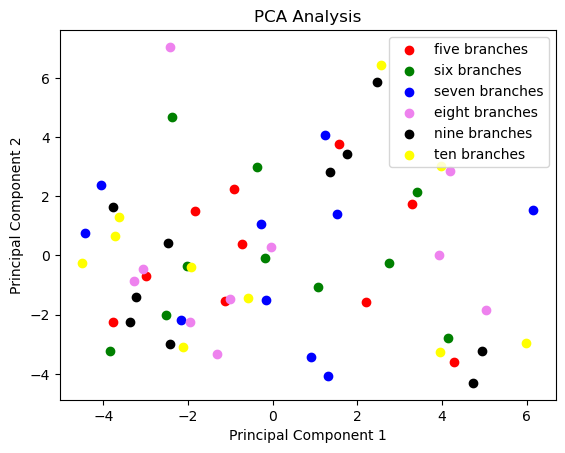

In [55]:
num_samples = 10

five = torch.stack(five_branch)[:num_samples].unsqueeze(0)
six = torch.stack(six_branch)[:num_samples].unsqueeze(0)
seven = torch.stack(seven_branch)[:num_samples].unsqueeze(0)
eight = torch.stack(eight_branch)[:num_samples].unsqueeze(0)
nine = torch.stack(nine_branch)[:num_samples].unsqueeze(0)
ten = torch.stack(ten_branch)[:num_samples].unsqueeze(0)

data = torch.cat([five, six, seven, eight, nine, ten], dim = 0)
data = data.view(data.shape[0], data.shape[1], -1).numpy()

colors = ['red', 'green', 'blue', 'violet', 'black', 'yellow']
branches = ["five", "six", "seven", "eight", "nine", "ten"]


# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization

for i, data_set_branch in enumerate(data):
    data_pca = data_set_branch
    data_reduced = pca.fit_transform(data_pca)
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=colors[i], label=f'{branches[i]} branches')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis')
plt.legend()
plt.show()

### latent representation of size 300

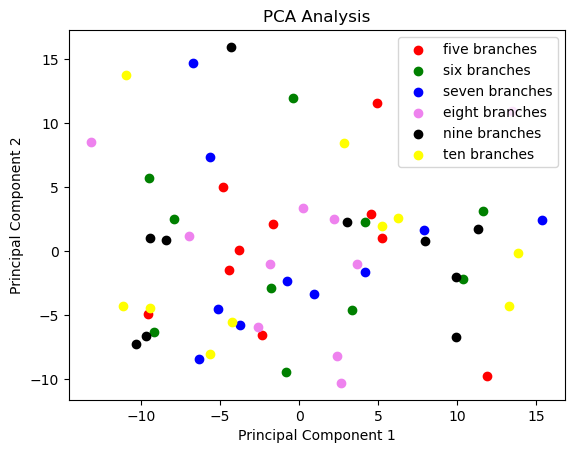

In [56]:
five_latent = encoder(five.squeeze().float()).unsqueeze(0)
six_latent = encoder(six.squeeze().float()).unsqueeze(0)
seven_latent = encoder(seven.squeeze().float()).unsqueeze(0)
eight_latent = encoder(eight.squeeze().float()).unsqueeze(0)
nine_latent = encoder(nine.squeeze().float()).unsqueeze(0)
ten_latent = encoder(ten.squeeze().float()).unsqueeze(0)

data = torch.cat([five_latent, six_latent, seven_latent, eight_latent, nine_latent, ten_latent], dim = 0)

colors = ['red', 'green', 'blue', 'violet', 'black', 'yellow']
branches = ["five", "six", "seven", "eight", "nine", "ten"]

# Perform PCA analysis
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization

for i, data_set_branch in enumerate(data):
    data_pca = data_set_branch.detach().numpy()
    data_reduced = pca.fit_transform(data_pca)
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=colors[i], label=f'{branches[i]} branches')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis')
plt.legend()
plt.show()

# t-SNE

### input merger trees of size (3, 29, 10)

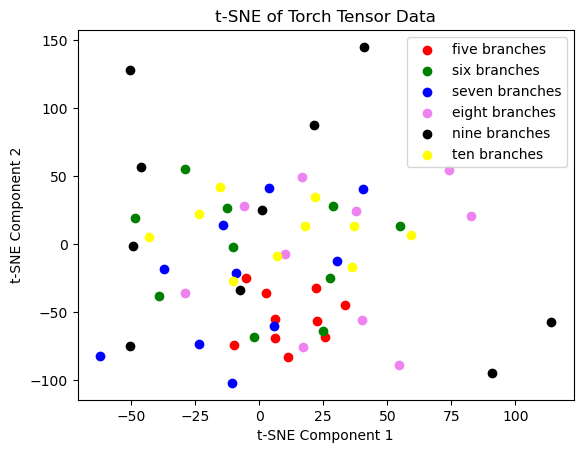

In [57]:
num_samples = 10

five = torch.stack(five_branch)[:num_samples].unsqueeze(0)
six = torch.stack(six_branch)[:num_samples].unsqueeze(0)
seven = torch.stack(seven_branch)[:num_samples].unsqueeze(0)
eight = torch.stack(eight_branch)[:num_samples].unsqueeze(0)
nine = torch.stack(nine_branch)[:num_samples].unsqueeze(0)
ten = torch.stack(ten_branch)[:num_samples].unsqueeze(0)

data = torch.cat([five, six, seven, eight, nine, ten], dim = 0)
data = data.view(data.shape[0], data.shape[1], -1).numpy()

colors = ['red', 'green', 'blue', 'violet', 'black', 'yellow']
branches = ["five", "six", "seven", "eight", "nine", "ten"]


# Perform PCA

tsne = TSNE(n_components=2, perplexity=num_samples - 5) 

for i, data_set_branch in enumerate(data):
    data_t_sne = data_set_branch
    data_tsne = tsne.fit_transform(data_t_sne)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=colors[i], label=f'{branches[i]} branches')
    
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Torch Tensor Data')
plt.legend()
plt.show()


### latent representation of size 300

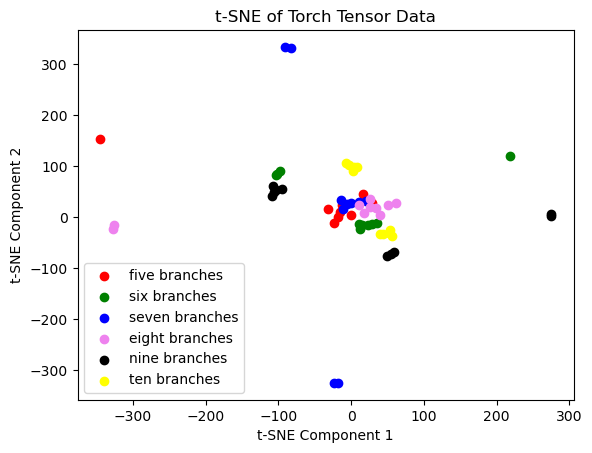

In [61]:
five_latent = encoder(five.squeeze().float()).unsqueeze(0)
six_latent = encoder(six.squeeze().float()).unsqueeze(0)
seven_latent = encoder(seven.squeeze().float()).unsqueeze(0)
eight_latent = encoder(eight.squeeze().float()).unsqueeze(0)
nine_latent = encoder(nine.squeeze().float()).unsqueeze(0)
ten_latent = encoder(ten.squeeze().float()).unsqueeze(0)

data = torch.cat([five_latent, six_latent, seven_latent, eight_latent, nine_latent, ten_latent], dim = 0)

colors = ['red', 'green', 'blue', 'violet', 'black', 'yellow']
branches = ["five", "six", "seven", "eight", "nine", "ten"]


tsne = TSNE(n_components=2, perplexity=num_samples - 9) 

for i, data_set_branch in enumerate(data):
    data_t_sne = data_set_branch.detach().numpy()
    data_tsne = tsne.fit_transform(data_t_sne)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=colors[i], label=f'{branches[i]} branches')
    
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Torch Tensor Data')
plt.legend()
plt.show()
